<a href="https://colab.research.google.com/github/TranThaiAn19146304/AI_project/blob/main/robot_2dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BƯỚC 1: THÊM THƯ VIỆN BAN ĐẦU**

In [15]:
#Thêm một số thư viện ban đầu
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import pandas as pd

In [16]:
#tạo hàm con vẽ đồ thị
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

**BƯỚC 2: TẠO DỮ LIỆU ( GHI FILE .CSV)**

In [17]:
from re import U
import matplotlib.pyplot as plt
import math
import csv
import numpy as np

u = []
for i in range(0,181,2):
  z=[]
  for j in range(0,181,2):
    x=50*math.cos(math.radians(i))+40*math.cos(math.radians(i+j))
    y=50*math.sin(math.radians(i))+40*math.sin(math.radians(i+j))
    z.append(np.array((i,j,x,y)))
  u.extend(z)

In [18]:
header = ['anpha', 'beta', 'x', 'y']
with open('robot_2dof.csv', 'w', encoding='UTF8', newline='') as f:
  writer = csv.writer(f)
  # write the header
  writer.writerow(header)
  # write multiple rows
  writer.writerows(u)

**BƯỚC 3 : XỬ LÍ DATA**

In [19]:
data = pd.read_csv('robot_2dof.csv')
data.shape
numpy_dataset = data.values

y=numpy_dataset[:,:2]
x=numpy_dataset[:,2:]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

**BƯỚC 4: TẠO MODEL**

In [27]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2))
model.summary()
model.compile(loss='mse', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 50, validation_split = 0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               384       
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 2)                

**BƯỚC 5: KIỂM TRA CHẤT LƯỢNG**

sai so kiem tra la 8.956902503967285
do chinh xac kiem tra 0.9843090176582336


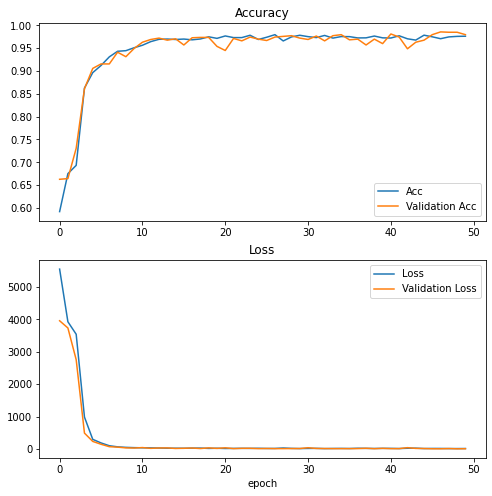

In [28]:
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la',score[0])
print('do chinh xac kiem tra',score[1])
plot_history(history)

**BƯỚC 6 : NHẬN DẠNG**

In [38]:
px = float(input("nhập px : "))
py = float(input("nhập py : "))
test = model.predict([[px,py]])
t1 = test[0][0]
t2 = test[0][1]
x=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))
y=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))
print("Dự đoán : " + "t1: " + str(t1) + ", " + "t2: " + str(t2))
print("Dự đoán : " + "px: " + str(x) + ", " + "py: " + str(y))


nhập px : 45
nhập py : 54
Dự đoán : t1: 16.507948, t2: 76.59157
Dự đoán : px: 45.776200000264005, py: 54.14890236357398


**BƯỚC 7 : LƯU MODEL**

In [ ]:
model.save('Robot_2dof.h5')